# Análise Dataset Carros Usados

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Carregando o dataset para ler informações

In [5]:
df = pd.read_csv('carros_usados.csv', sep=';')
df.head()

,data.set,total.cost,lot.sale.days,overage,mileage,vehicle.type,domestic.import,vehicle.age,vehicle.age.group,color.set,makex,state,make.model
0,TRAIN,4037,135,YES,67341,FAMILY.LARGE,Domestic,8,SEVEN+,SILVER,BUICK,CA,BUICK.CENTURY
1,TRAIN,6886,114,YES,72823,FAMILY.MEDIUM,Domestic,6,SIX,WHITE,DODGE,AZ,DODGE.NEON
2,TRAIN,3924,205,YES,96330,FAMILY.MEDIUM,Domestic,9,SEVEN+,WHITE,OLDSMOBILE,FL,OLDSMOBILE.CUTLASS SUPREME
3,TRAIN,4636,100,YES,58519,ECONOMY,Import,4,FOUR,GOLD,KIA,NV,KIA.SEPHIA
4,TRAIN,5080,129,YES,99057,FAMILY.MEDIUM,Domestic,4,FOUR,GREEN,OLDSMOBILE,NV,OLDSMOBILE.CUTLASS SUPREME


# Informações gerais sobre o dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7495 entries, 0 to 7494
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   data.set           7495 non-null   object
 1   total.cost         7495 non-null   int64 
 2   lot.sale.days      7495 non-null   int64 
 3   overage            7495 non-null   object
 4   mileage            7495 non-null   int64 
 5   vehicle.type       7495 non-null   object
 6   domestic.import    7495 non-null   object
 7   vehicle.age        7495 non-null   int64 
 8   vehicle.age.group  7495 non-null   object
 9   color.set          7495 non-null   object
 10  makex              7495 non-null   object
 11  state              7495 non-null   object
 12  make.model         7495 non-null   object
dtypes: int64(4), object(9)
memory usage: 761.3+ KB


In [8]:
df.describe()

,total.cost,lot.sale.days,mileage,vehicle.age
count,7495.000000,7495.000000,7495.000000,7495.000000
mean,4980.035490,76.454303,77234.533422,5.567312
std,937.602064,64.644337,17142.552588,1.756219
min,1375.000000,0.000000,1036.000000,1.000000
25%,4354.000000,14.000000,67946.000000,4.000000
50%,4919.000000,73.000000,78534.000000,5.000000
75%,5540.000000,120.000000,89340.000000,7.000000
max,9813.000000,300.000000,119250.000000,12.000000


# 1. Vendas e Estoques

# Qual é o tempo médio em dias que os veículos passam no lote antes de serem vendidos (lot.sale.days)?



In [17]:
mean1 = df['lot.sale.days'].mean()
print(f'Tempo médio em dias que os veículos passam no lote antes de serem vendidos: {mean1:.2f} dias')

Tempo médio em dias que os veículos passam no lote antes de serem vendidos: 76.45 dias


# Veículos de que tipo (vehicle.type) têm o menor tempo de venda?


In [58]:
mean2 = df.groupby(['vehicle.type'])
mean3 = mean2['lot.sale.days'].mean()  
minimum = mean3[mean3 == mean3.min()]
print(f'Veículos de que tipo {minimum.index[0]} têm o menor tempo de venda com {minimum.values[0]:.2f} dias')


Veículos de que tipo LUXURY têm o menor tempo de venda com 61.98 dias


# Como a quilometragem (mileage) influencia o tempo de venda (lot.sale.days)?

In [80]:
correlation = df['lot.sale.days'].corr(df['mileage'])
print(f'A correlação entre lot.sale.days e mileage é: {correlation:.2f}. \nIsso indica que há baixa ou inexistente correlação entre a quilometragem e o tempo de venda dos veículos.')

A correlação entre lot.sale.days e mileage é: 0.06. 
Isso indica que há baixa ou inexistente correlação entre a quilometragem e o tempo de venda dos veículos.


# Existe alguma diferença significativa no total.cost de veículos com cores diferentes (color.set)?

<Axes: xlabel='total.cost'>

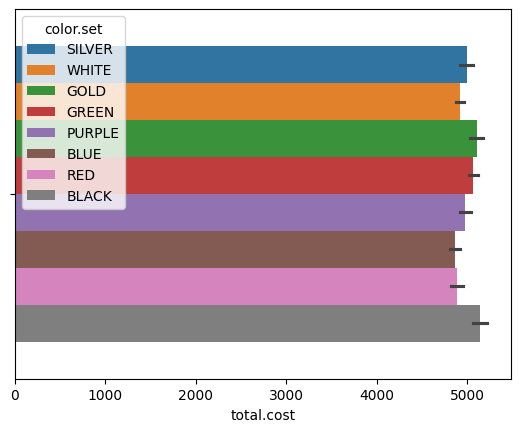

In [129]:
z = df[['total.cost', 'color.set']]
avg_color = z.groupby(['color.set']).mean().reset_index().sort_values(by='total.cost', ascending=False)
sns.barplot(data=z, x= 'total.cost', hue='color.set', fill=True)


# Cor de carro mais vendidas

In [123]:
z = df.groupby(['color.set']).count().sort_values(by='data.set', ascending=False) 
z

,data.set,total.cost,lot.sale.days,overage,mileage,vehicle.type,domestic.import,vehicle.age,vehicle.age.group,makex,state,make.model
color.set,,,,,,,,,,,,
WHITE,1602,1602,1602,1602,1602,1602,1602,1602,1602,1602,1602,1602
GREEN,1431,1431,1431,1431,1431,1431,1431,1431,1431,1431,1431,1431
BLUE,1153,1153,1153,1153,1153,1153,1153,1153,1153,1153,1153,1153
PURPLE,817,817,817,817,817,817,817,817,817,817,817,817
SILVER,721,721,721,721,721,721,721,721,721,721,721,721
GOLD,688,688,688,688,688,688,688,688,688,688,688,688
RED,614,614,614,614,614,614,614,614,614,614,614,614
BLACK,469,469,469,469,469,469,469,469,469,469,469,469




# Existe alguma correlação entre o vehicle.age (idade do veículo) e o total.cost (custo total)?


In [ ]:
x = df[['total.cost', 'mileage']].corr().iloc[0, 1]

print(f'A correlação entre total.cost e mileage é: {x:.2f}. \nIsso indica que há uma correlação negativa fraca  entre o custo total e a quilometragem dos veículos.')

A correlação entre total.cost e mileage é: -0.13. 
Isso indica que há uma correlação positiva moderada entre o custo total e a quilometragem dos veículos.


# 2. Preço e Custos



# Qual é o preço médio dos veículos vendidos, segmentado por state (estado)?


In [146]:
df.groupby(['state']).agg({'total.cost': 'mean'}).sort_values(by='total.cost', ascending=False)

,total.cost
state,
GA,5123.230874
NV,5092.811245
TX,5065.806061
CA,5064.960861
AZ,4931.399261
VA,4881.094903
FL,4821.242279
NM,4691.565022


# Veículos importados (domestic.import) são, em média, mais caros que os domésticos?


In [163]:
z = df.groupby(['domestic.import']).agg({'total.cost': 'mean'}).sort_values(by='total.cost', ascending=False)
print(z)
print(f'Os veículos importados são, em média, mais caros que os domésticos')

                  total.cost
domestic.import             
Import           5088.144105
Domestic         4932.471854
Os veículos importados são, em média, mais caros que os domésticos


# Existe alguma diferença significativa no total.cost de veículos com cores diferentes (color.set)?

Veículos pretos custam mais. Cores diferentes tem preços diferentes.


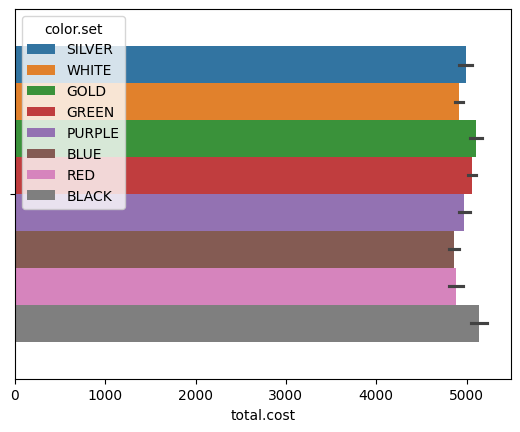

In [189]:
z = df[['total.cost', 'color.set']]
avg_total_cost = z.groupby(['color.set']).mean().reset_index().sort_values(by='total.cost', ascending=False)
sns.barplot(data=z, x='total.cost', hue='color.set', fill=True)
print("Veículos pretos custam mais. Cores diferentes tem preços diferentes.")

# Como o total.cost varia por vehicle.age.group (grupo de idade) e por tipo de veículo (vehicle.type)?


<Axes: xlabel='total.cost', ylabel='vehicle.age.group'>

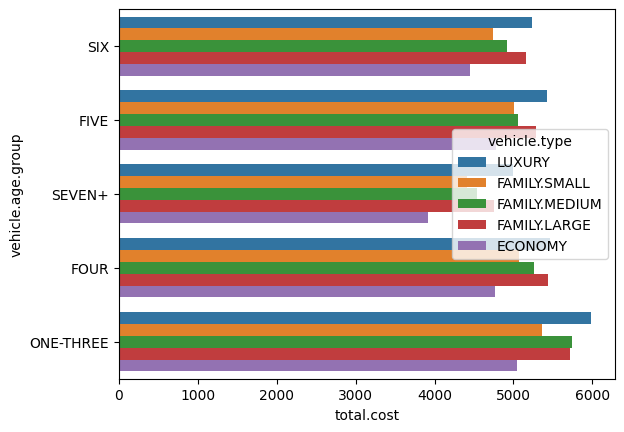

In [194]:
z = df[['total.cost', 'vehicle.type', 'vehicle.age.group']].groupby(['vehicle.age.group', 'vehicle.type']).mean().reset_index().sort_values(by='vehicle.type', ascending=False)
sns.barplot(data=z, x='total.cost', y='vehicle.age.group', hue = 'vehicle.type', fill=True)

In [197]:
z = df[['total.cost', 'vehicle.type']].groupby(['vehicle.type']).mean().reset_index().sort_values(by='total.cost', ascending=False)
print(z)

    vehicle.type   total.cost
4         LUXURY  5197.543501
1   FAMILY.LARGE  5082.039676
2  FAMILY.MEDIUM  4994.391175
3   FAMILY.SMALL  4923.364751
0        ECONOMY  4660.747925


# Quais marcas (makex) e modelos (make.model) são mais vendidas em cada estado?


In [260]:
w = df[['makex', 'make.model', 'state']].groupby(['makex', 'make.model', 'state']).count().reset_index().sort_values(by='state', ascending=False)
